In [ ]:
# !export HTTP_PROXY="http://10.68.69.53:80"
# !export HTTPS_PROXY="http://10.68.69.53:80"

# !export http_proxy="http://10.68.69.53:80"
# !export https_proxy="http://10.68.69.53:80"

In [1]:
from google.colab import drive
drive.mount('/content/drive')

path = "drive/My Drive/Colab Notebooks/eva6/Session_7"
import sys
sys.path.append(path)
%load_ext autoreload
%autoreload 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
from src.dataLoader import Loader
from src.plots import Plots
from src.model import Model_loader
from src.optimise import learner

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_transform,test_transform = Loader.transform()
train_data,test_data = Loader.Loader(train_transform,test_transform)

Files already downloaded and verified
Files already downloaded and verified


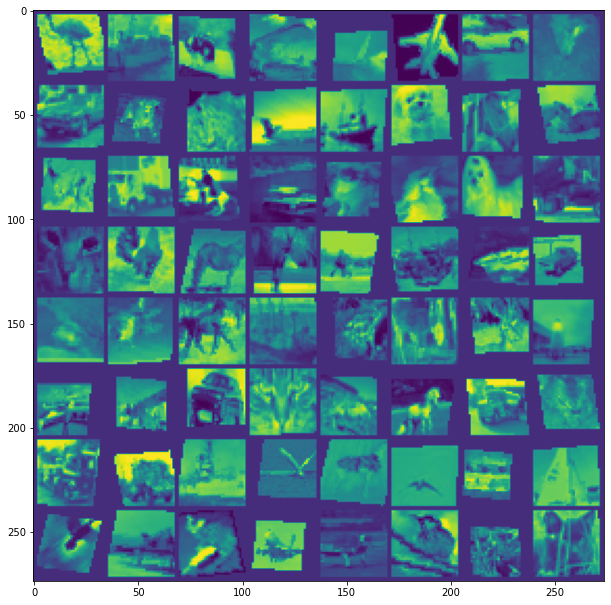

In [4]:
Plots.sampleVisual(train_data)

In [4]:
use_cuda = torch.cuda.is_available()
device = 'cuda:0' if use_cuda else 'cpu'

In [5]:
model = Model_loader.models(device)
(train_acc, train_losses, test_acc, test_losses), ln_model= learner(model, train_data, test_data, 1, device)

Loss=2.3068795204162598 Batch_id=1 Accuracy=10.94:   0%|          | 2/782 [00:00<00:59, 13.06it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------
None
Epoch 1:


Loss=1.6975516080856323 Batch_id=781 Accuracy=23.26: 100%|██████████| 782/782 [00:52<00:00, 14.91it/s]



Test set: Average loss: -1.1968, Accuracy: 11642/50000 (23.28%)



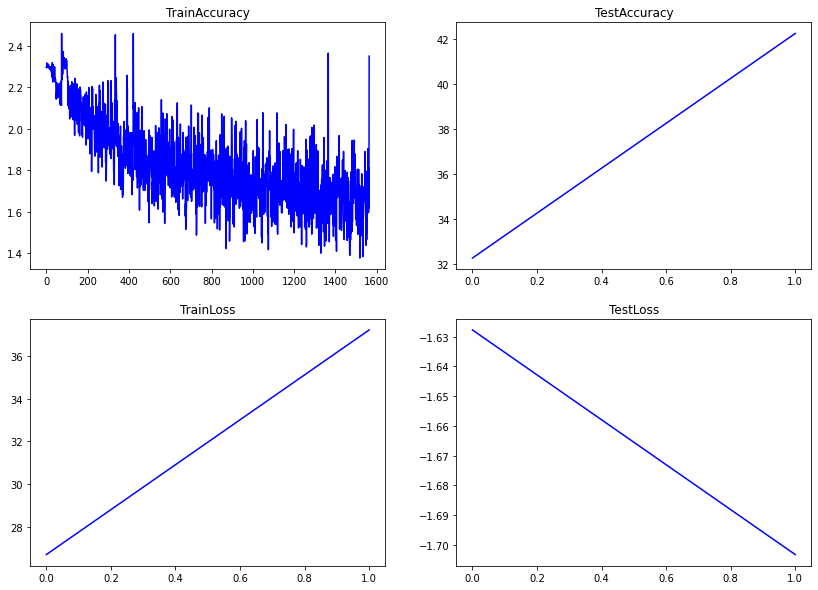

In [24]:
Plots.stat_graph(train_acc, train_losses, test_acc, test_losses)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




1 [ Predicted Value: 6, Actual Value: 2 ]


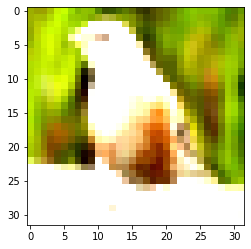

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




2 [ Predicted Value: 2, Actual Value: 5 ]


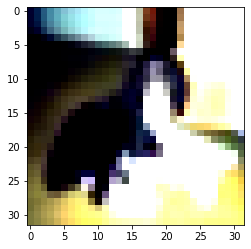

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




3 [ Predicted Value: 2, Actual Value: 0 ]


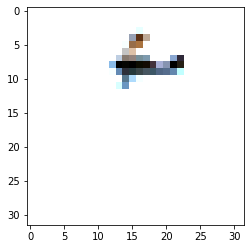

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




4 [ Predicted Value: 2, Actual Value: 5 ]


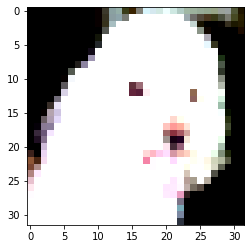

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




5 [ Predicted Value: 2, Actual Value: 5 ]


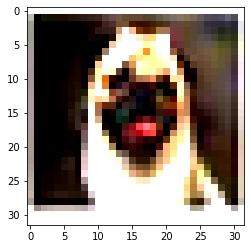

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




6 [ Predicted Value: 2, Actual Value: 6 ]


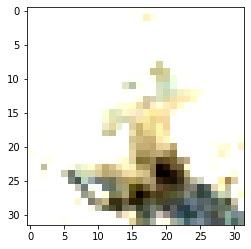

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




7 [ Predicted Value: 1, Actual Value: 8 ]


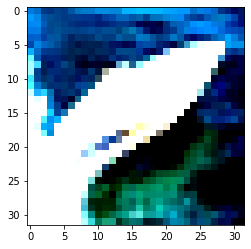

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




8 [ Predicted Value: 2, Actual Value: 4 ]


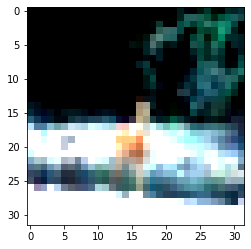

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




9 [ Predicted Value: 6, Actual Value: 9 ]


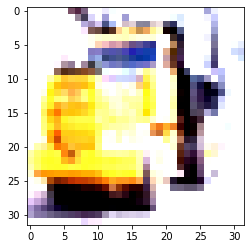

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




10 [ Predicted Value: 3, Actual Value: 1 ]


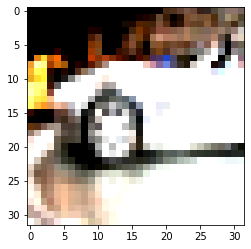

In [11]:
Plots.miscImages(ln_model,test_data,device)

In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_data:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = ln_model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 53 %
Accuracy of   car : 52 %
Accuracy of  bird :  5 %
Accuracy of   cat : 16 %
Accuracy of  deer : 38 %
Accuracy of   dog : 33 %
Accuracy of  frog : 34 %
Accuracy of horse : 67 %
Accuracy of  ship : 44 %
Accuracy of truck : 60 %
